In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import importlib
import speccy as gary

In [171]:
importlib.reload(gary.sick_tricks)
importlib.reload(gary.dwelch)
importlib.reload(gary.sample)

<module 'speccy.sample' from '/Users/00077063/Documents/PostDoc/20230714_speccy/speccy/speccy/sample.py'>

## Sample data
Set parameters and generate an AR(4) process

In [109]:
m = 2**6
l = 2**9
overlap = 0
s = l * (1 - overlap)
n = (m - 1) * s + l
delta = 1
k = int(l/4)

phis = np.array([2.7607, -3.8106, 2.6535, -0.9238])
sd = 1

sampled_ar = gary.sample.sample_ar(n, phis, sd)

Define two tapers that we'll look at and calculate Welch's estimate of the AR process. We will show results for the boxcar and Hamming tapers side-by-side.

/Users/00077063/Documents/PostDoc/20230714_speccy/speccy/speccy/dwelch.py:19: RuntimeWarning: invalid value encountered in divide
  value = np.sin(x)/x


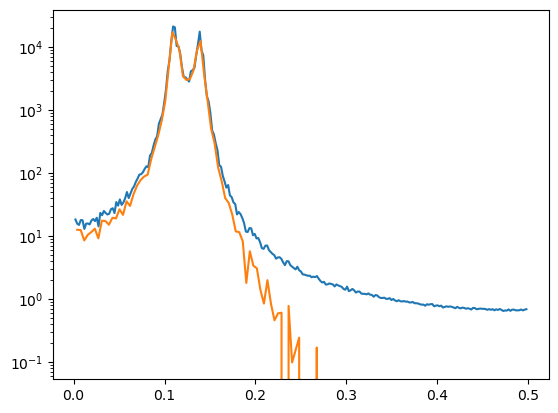

In [172]:
h_hm = signal.windows.hamming(l)
h_bc = np.repeat(1, l)

# Steps for dwelch. First, our own pwelch. DONE.
f, pw = gary.dwelch.pwelch(sampled_ar, m, l, s)

centres, dw = gary.dwelch.dwelch(sampled_ar, m, l, s, k, h=h_bc)

plt.plot(f, pw)
plt.plot(centres, dw)
plt.yscale('log')

### Generate data
Use Gaussian sample and random amplitude sample

/Users/00077063/Documents/PostDoc/20230714_speccy/speccy/speccy/acf.py:17: RuntimeWarning: invalid value encountered in multiply
  K *= K_nu(nu, np.abs(lmbda * dx))


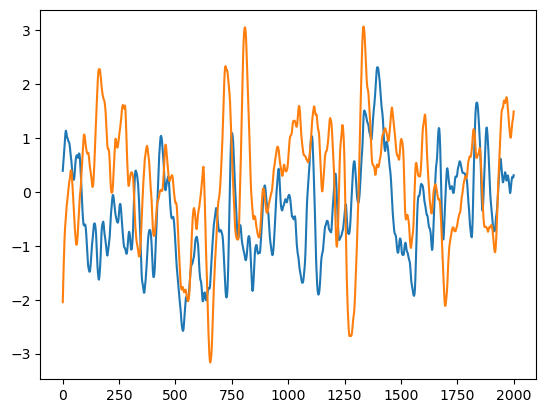

In [4]:
acf_true = gary.acf.matern(tt, params, sigma = sigma);

gauss_sample = gary.sample.mv_gaussian(acf_true)
ra_sample = gary.sample.random_amplitudes(gary.psd.matern, params, n, delta)

plt.plot(tt, ra_sample)
plt.plot(tt, gauss_sample)

### Look at periodograms

(1e-10, 1000.0)

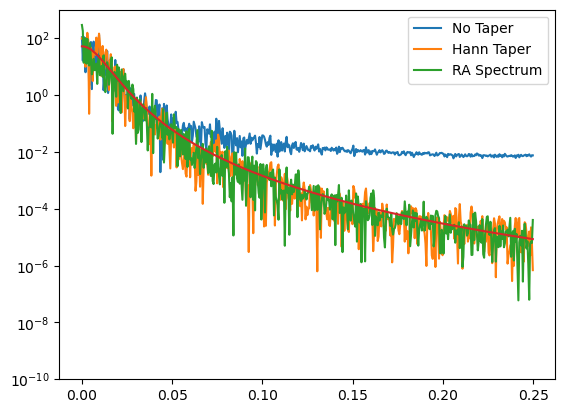

In [6]:
h = signal.windows.hann(n)

ff_taper, I_taper = gary.periodogram(gauss_sample, delta, h)
ff_gauss, I_gauss = gary.periodogram(gauss_sample, delta)
ff_ra, I_ra = gary.periodogram(ra_sample, delta)

plt.plot(ff_gauss, I_gauss, label = "No Taper")
plt.plot(ff_taper, I_taper, label = "Hann Taper")
plt.plot(ff_ra, I_ra, label = "RA Spectrum")
plt.plot(ff_ra, gary.psd.matern(ff_ra, params))
plt.yscale('log')
plt.legend()
plt.ylim(1e-10, 1e3)

### Whittle likelihoods

In [46]:
print("No Taper likelihood = " + str(gary.whittle(gauss_sample, gary.psd.matern, params, delta)))
print("Taper likelihood = " + str(gary.whittle(gauss_sample, gary.psd.matern, params, delta, h)))
print("Debiased likelihood = " + str(gary.dwhittle(gauss_sample, gary.acf.matern, params, delta)))

No Taper likelihood = -6291.2586700214615
Taper likelihood = 5535.539424718429
Debiased likelihood = 3884.4236951895
